# 风场图

本节介绍如何使用 cedarkit-maps 绘制 850 hPa 风场图。

首先导入需要使用的包。包括：

- 数据结构：numpy, pandas
- 可视化：matplotlib
- cedarkit 工具套件
    - 数据准备：reki
        - 数据查找函数： `find_local_file`
        - GRIB2文件要素加载函数：`load_field_from_file`
    - 气象可视化：cedarkit.maps
        - 绘图板：`Panel`
        - 底图布局：`EastAsiaMapDomain`
        - 绘图样式：`BarbStyle`

In [3]:
import pandas as pd

from reki.data_finder import find_local_file
from reki.format.grib.eccodes import load_field_from_file

from cedarkit.maps.style import BarbStyle
from cedarkit.maps.chart import Panel
from cedarkit.maps.domains import EastAsiaMapTemplate

设置绘图的数据参数，使用 CMA-GFS 2024 年 11 月 14 日 00 时次 024 时效数据。

In [4]:
system_name = "CMA-GFS"
data_type = "cma_gfs_gmf/grib2/orig"
start_time = pd.to_datetime("2024-11-14 00:00:00")
forecast_time = pd.to_timedelta("24h")

## 加载数据

获取 GRIB2 数据路径

In [5]:
file_path = find_local_file(
    data_type,
    start_time=start_time,
    forecast_time=forecast_time,
)
file_path

PosixPath('/g3/COMMONDATA/OPER/CEMC/GFS_GMF/Prod-grib/2024111400/ORIG/gmf.gra.2024111400024.grb2')

加载 850 hPa 风场。风场在 ecCodes 的内置要素名为 `u` 和 `v`

In [6]:
u_850_field = load_field_from_file(
    file_path,
    parameter="u",
    level_type="pl",
    level=850
)
v_850_field = load_field_from_file(
    file_path,
    parameter="v",
    level_type="pl",
    level=850
)
v_850_field

<xarray.DataArray 'v' (latitude: 1440, longitude: 2880)> Size: 33MB
array([[ 0.71418457,  0.71418457,  0.71418457, ...,  0.69418457,
         0.70418457,  0.70418457],
       [ 0.68418457,  0.68418457,  0.69418457, ...,  0.67418457,
         0.68418457,  0.68418457],
       [ 0.44418457,  0.44418457,  0.44418457, ...,  0.44418457,
         0.44418457,  0.44418457],
       ...,
       [-5.38581543, -5.45581543, -5.45581543, ..., -5.45581543,
        -5.43581543, -5.43581543],
       [-5.13581543, -5.30581543, -5.29581543, ..., -5.34581543,
        -5.32581543, -5.32581543],
       [-3.73581543, -3.84581543, -3.83581543, ..., -3.86581543,
        -3.86581543, -3.86581543]])
Coordinates:
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B 1 days
    valid_time  datetime64[ns] 8B ...
    pl          float64 8B 850.0
  * latitude    (latitude) float64 12kB 89.94 89.81 89.69 ... -89.81 -89.94
  * longitude   (longitude) float64 23kB 0.0 0.125 0.25 ... 359.6 359.8 359.9
Attributes: (12/17)
    GRIB_edition:             2
    GRIB_centre:              babj
    GRIB_subCentre:           0
    GRIB_tablesVersion:       4
    GRIB_localTablesVersion:  0
    GRIB_dataType:            fc
    ...                       ...
    GRIB_stepType:            instant
    GRIB_stepUnits:           1
    GRIB_stepRange:           24
    GRIB_endStep:int:         24
    GRIB_count:               189
    long_name:                discipline=0 parmcat=2 parm=3

## 配置

定义风场图样式 (`BarbStyle`)

In [7]:
wind_barb_style = BarbStyle(
    barbcolor="red",
    flagcolor="red",
    linewidth=0.3,
)

## 绘制

创建中国区域底图布局

In [8]:
domain = EastAsiaMapTemplate()

绘图风场图，设置标题。

> 注：这里将风场稀疏化后再绘图，并只在主区域（第 1 层）绘图，即 `layer=[0]`

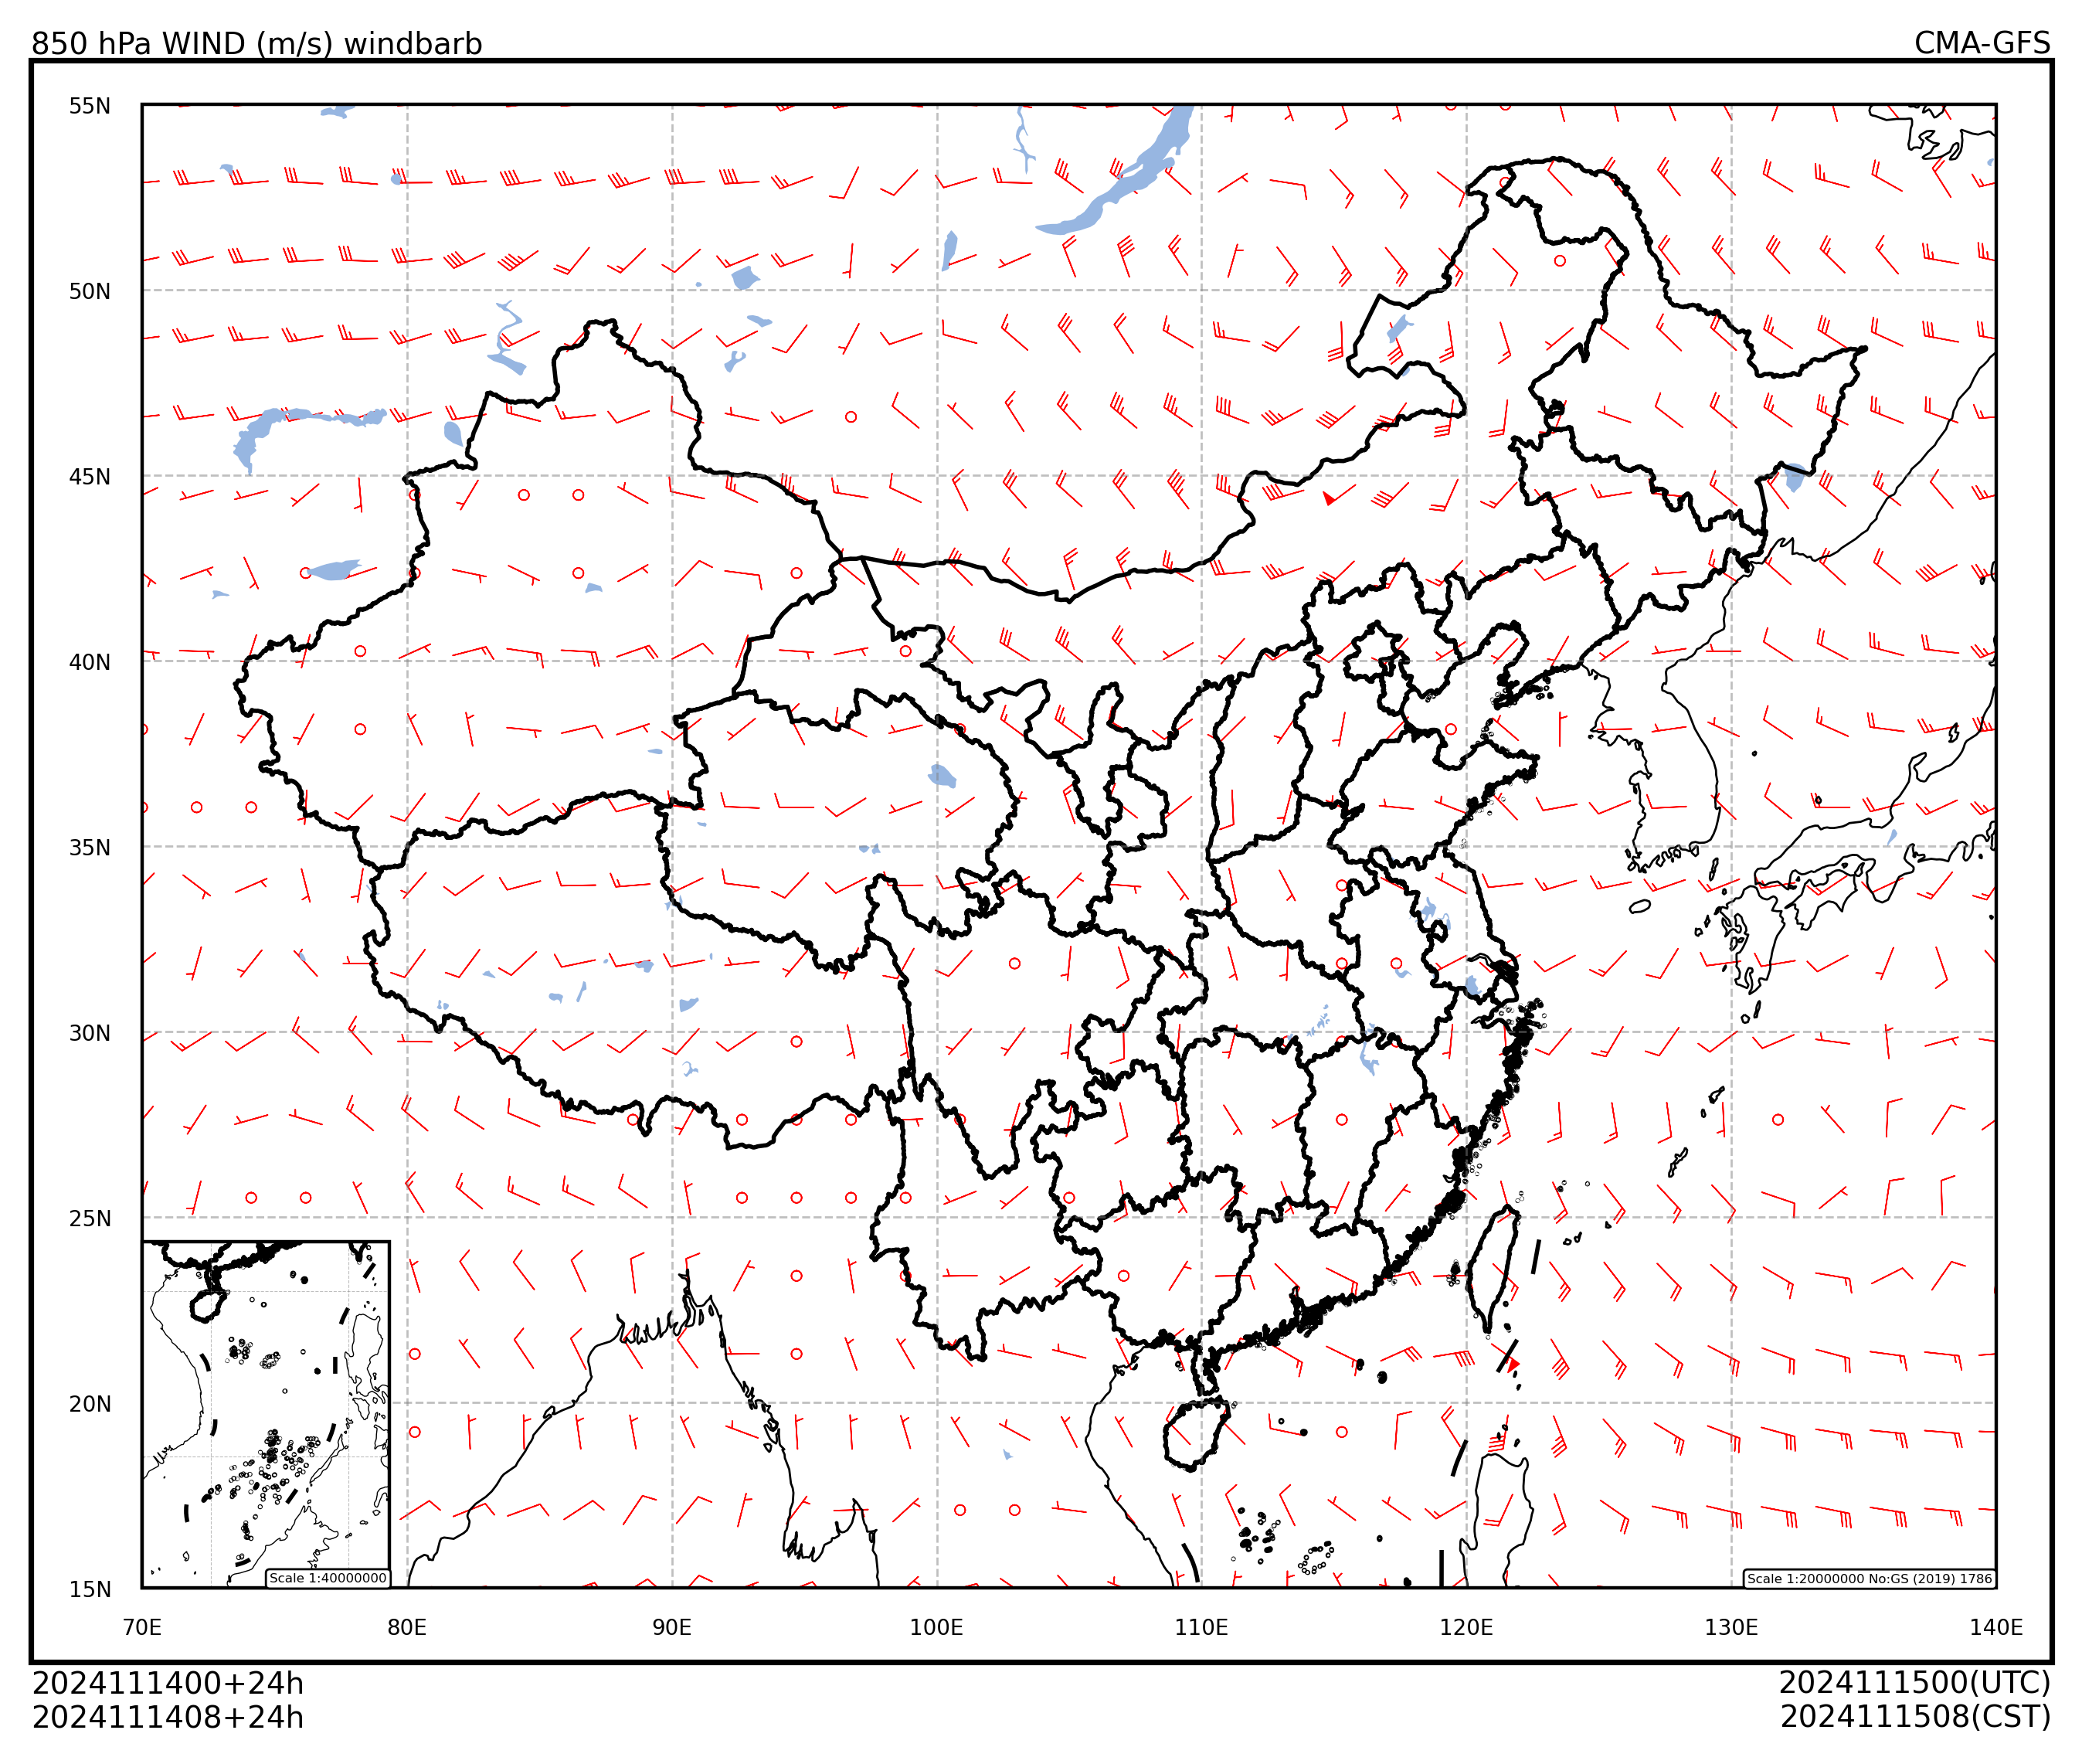

In [10]:
panel = Panel(domain=domain)
panel.plot([[u_850_field[::14, ::14], v_850_field[::14, ::14]]], style=wind_barb_style, layer=[0])

domain.set_title(
    panel=panel,
    graph_name="850 hPa WIND (m/s) windbarb",
    system_name=system_name,
    start_time=start_time,
    forecast_time=forecast_time,
)
panel.show()